# Izračuni

V tem zvezku bodo narejeni nekateri izračuni, povezani s cilji projektne naloge

In [2]:
import random
import matplotlib.pyplot as plt

# za 3D risanje
from mpl_toolkits.mplot3d import Axes3D 

from kvadrat import razdalja, Kvadrat, Kocka

# spreminjanje velikosti grafov
plt.rcParams['figure.figsize'] = [10, 10]    # če grafi preveliki, pomanjšaj ti dve števili

## Dolžina drevesa najkrajših poti

Kako se spreminja dolžina drevesa, ko spreminjamo število točk in največjo dovoljeno razdaljo?

In [2]:
def dolzina_drevesa_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja skupna dolžina drevesa najkrajših poti, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    tocke = []    
    dolzine = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0
        for ata in oce:
            if oce[ata] is not None:
                dolzina += razdalja(ata, oce[ata])
        
        dolzine.append(dolzina)
            
    return tocke, dolzine
    

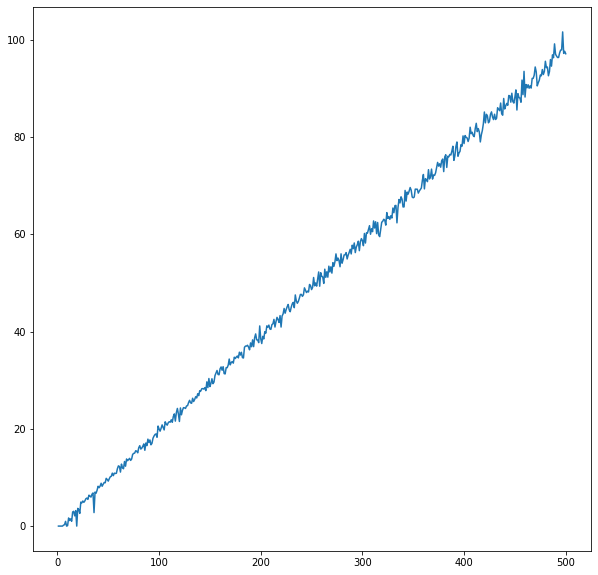

In [3]:
# narišemo dolžino v odvisnosti od števila točk

tocke, dolzine = dolzina_drevesa_tocke(500, 0.3)

plt.plot(tocke, dolzine);

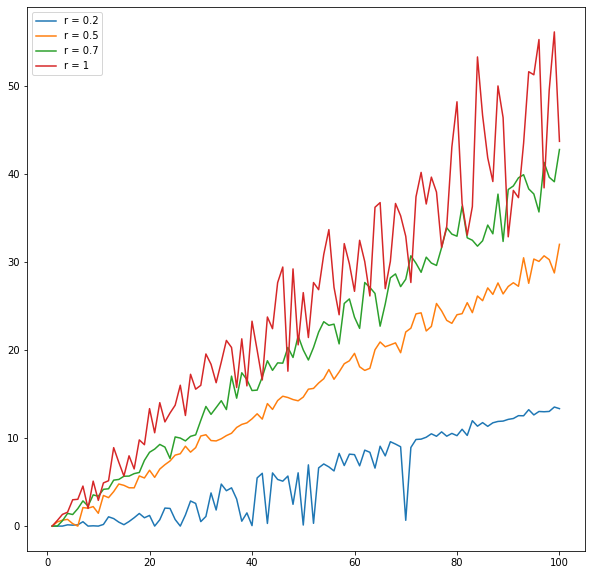

In [4]:
# izberemo nekaj možnih največjih razdalj in opazujemo, kaj se dogaja z dolžino drevesa

tocke1, dolzine1 = dolzina_drevesa_tocke(100, 0.2)
tocke2, dolzine2 = dolzina_drevesa_tocke(100, 0.5)
tocke3, dolzine3 = dolzina_drevesa_tocke(100, 0.7)
tocke4, dolzine4 = dolzina_drevesa_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

In [5]:
def dolzina_drevesa_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja skupna dolžina 
    drevesa najkrajših poti, ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        dolzina = 0
        for ata in oce:
            if oce[ata] is not None:
                dolzina += razdalja(ata, oce[ata])
        
        dolzine.append(dolzina)
        trenutna += korak
            
    return maxi, dolzine

CPU times: user 19.1 s, sys: 72.2 ms, total: 19.2 s
Wall time: 19.3 s


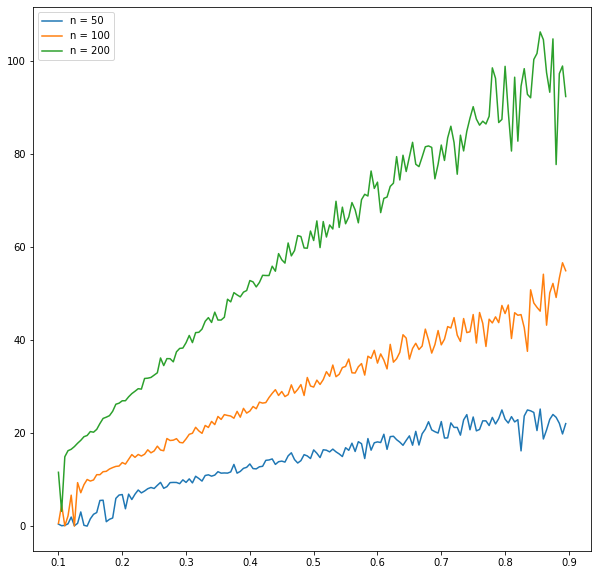

In [6]:
%%time

maxi1, dolzine1 = dolzina_drevesa_razdalja(50)
maxi2, dolzine2 = dolzina_drevesa_razdalja(100)
maxi3, dolzine3 = dolzina_drevesa_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 35.5 s, sys: 54.7 ms, total: 35.5 s
Wall time: 35.6 s


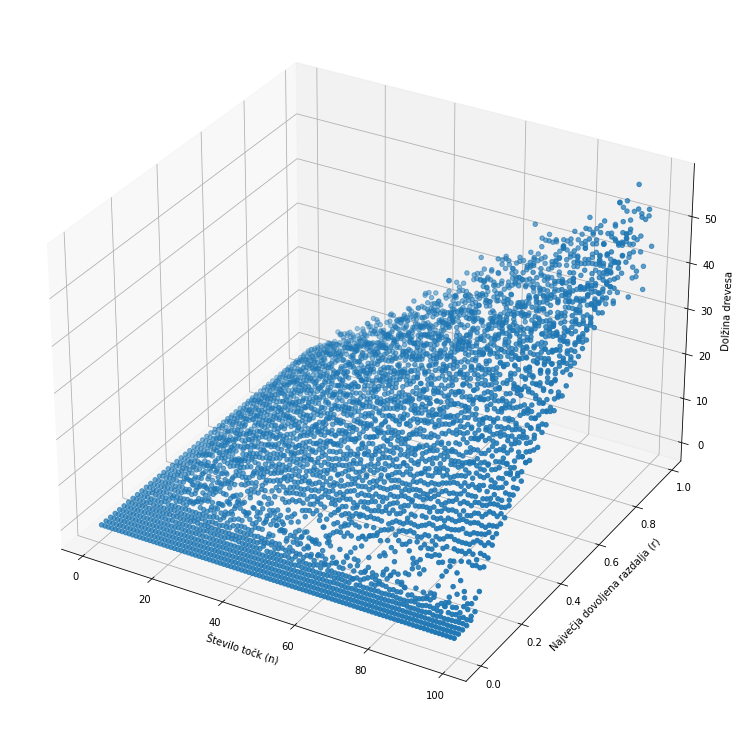

In [28]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.02

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, dolzine = dolzina_drevesa_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina drevesa')


ax.scatter(nji, maxiji, dolzineji);

CPU times: user 9.72 s, sys: 65.4 ms, total: 9.79 s
Wall time: 9.83 s


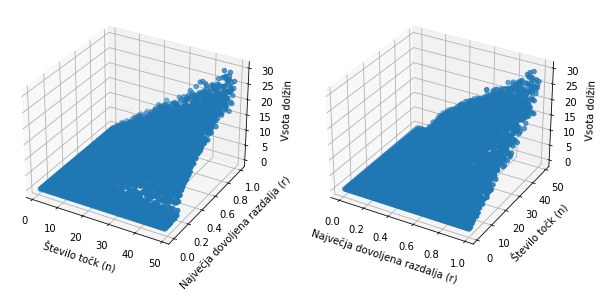

In [8]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.01

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 50):
    
    # izračunamo dolžine
    
    maxi, dolzine = dolzina_drevesa_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, dolzineji);

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_ylabel('Število točk (n)')
ax.set_xlabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(maxiji, nji, dolzineji);

## Vsota dolžin od korena do ostalih

Ponovno opazujemo ob spreminjanju števila točk in največje razdalje.

In [9]:
def vsota_razdalj_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja vsota razdalj od korena do ostalih, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    tocke = []
    vsote = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0
        for tocka in oddaljenost:
            # to je naš pogoj povezanosti; 
            # v Dijkstri nismo nikoli zmanjšali iz neskončno
            if oddaljenost[tocka] < 1000000:
                dolzina += oddaljenost[tocka]
            
        vsote.append(dolzina)
            
    return tocke, vsote

 

CPU times: user 15.1 s, sys: 52.5 ms, total: 15.2 s
Wall time: 15.2 s


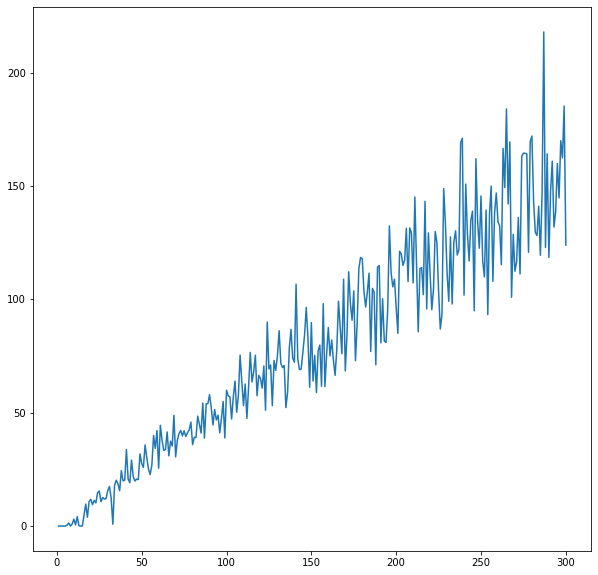

In [10]:
%%time

# narišemo vsoto v odvisnosti od števila točk

tocke, dolzine = vsota_razdalj_tocke(300, 0.3)

plt.plot(tocke, dolzine);

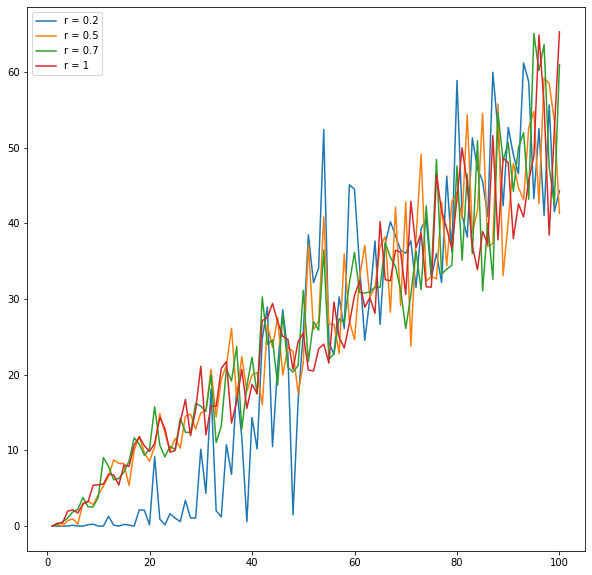

In [11]:
tocke1, dolzine1 = vsota_razdalj_tocke(100, 0.2)
tocke2, dolzine2 = vsota_razdalj_tocke(100, 0.5)
tocke3, dolzine3 = vsota_razdalj_tocke(100, 0.7)
tocke4, dolzine4 = vsota_razdalj_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

In [12]:
def vsota_razdalj_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja vsota razdalj,
    ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    vsote = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        vsota = 0
        for tocka in oddaljenost:
            if oddaljenost[tocka] < 1000000:
                vsota += oddaljenost[tocka]
        
        vsote.append(vsota)
        maxi.append(trenutna)
        trenutna += korak
            
    return maxi, vsote

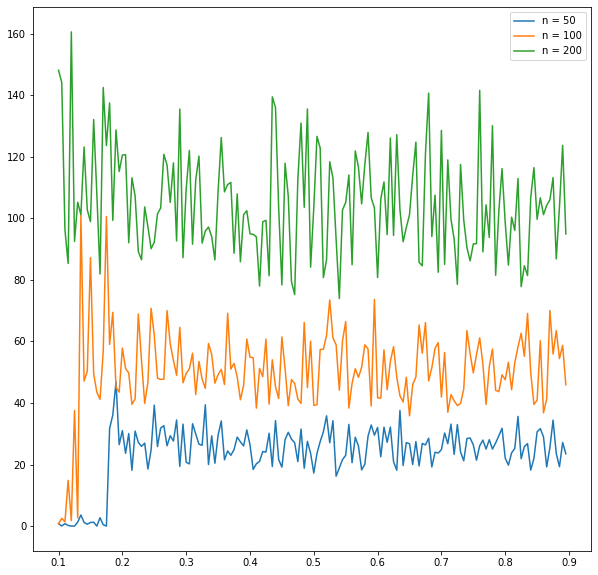

In [13]:
maxi1, dolzine1 = vsota_razdalj_razdalja(50)
maxi2, dolzine2 = vsota_razdalj_razdalja(100)
maxi3, dolzine3 = vsota_razdalj_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 1min 11s, sys: 186 ms, total: 1min 11s
Wall time: 1min 12s


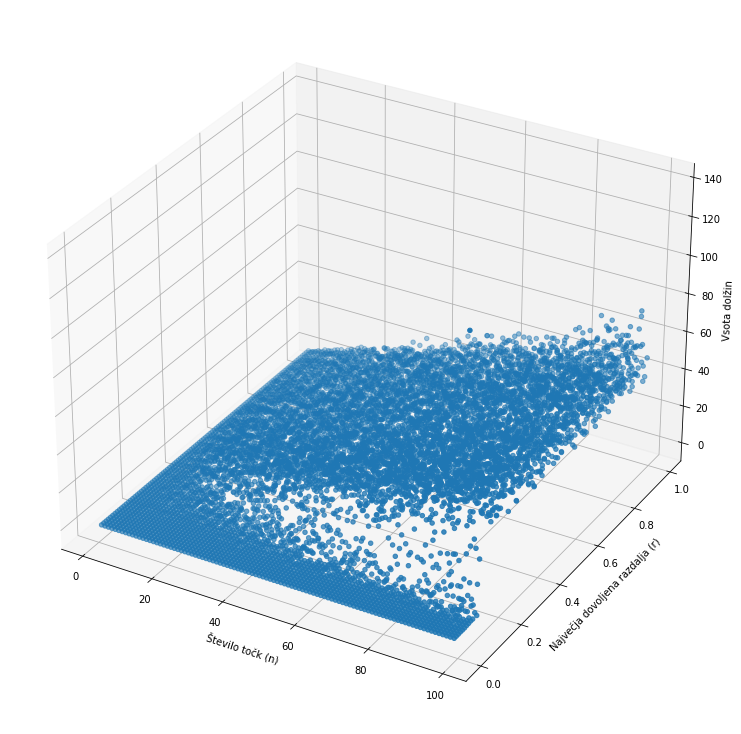

In [14]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.01

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, dolzine = vsota_razdalj_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')


ax.scatter(nji, maxiji, dolzineji);

CPU times: user 9.1 s, sys: 18.8 ms, total: 9.12 s
Wall time: 9.09 s


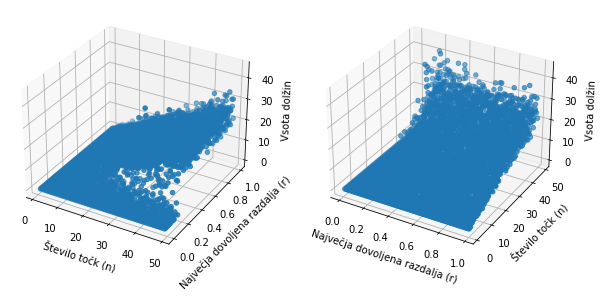

In [15]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.01

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 50):
    
    # izračunamo dolžine
    
    maxi, dolzine = vsota_razdalj_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, dolzineji);

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_ylabel('Število točk (n)')
ax.set_xlabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(maxiji, nji, dolzineji);

## Dolžina najdaljše poti

Gledamo kako se spreminja dolžina najkrajše in najdaljše poti v odvisnosti od n in r.
Lahko bi pričakovali, da se da dolžina z večanjem parametrov manjša, ampak je res temu tako?

In [16]:
def najdaljsa_pot_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja dolžina najdaljše poti, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    tocke = []    
    dolzine = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0    # da bo vedno definirano
        if max(oddaljenost.values()) < 1000000:
            dolzina = max(oddaljenost.values())
        
        dolzine.append(dolzina)
            
    return tocke, dolzine

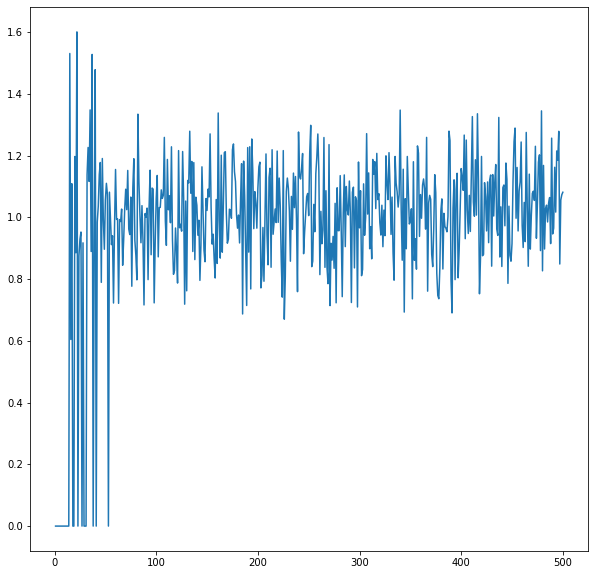

In [17]:
tocke, dolzine = najdaljsa_pot_tocke(500, 0.3)

plt.plot(tocke, dolzine);

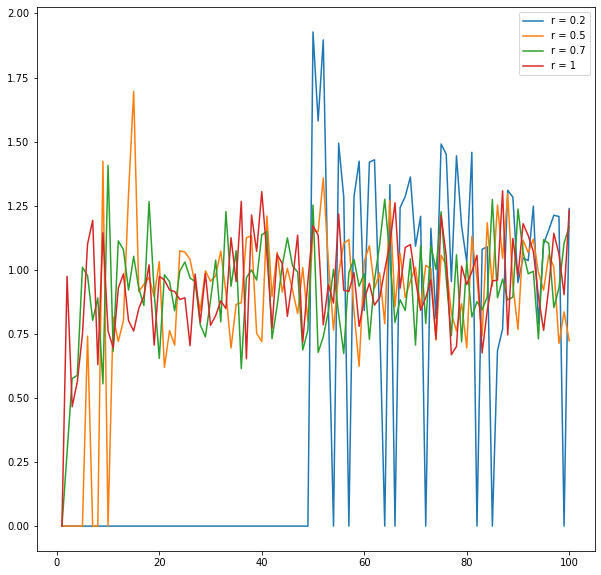

In [18]:
tocke1, dolzine1 = najdaljsa_pot_tocke(100, 0.2)
tocke2, dolzine2 = najdaljsa_pot_tocke(100, 0.5)
tocke3, dolzine3 = najdaljsa_pot_tocke(100, 0.7)
tocke4, dolzine4 = najdaljsa_pot_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

In [19]:
def najdaljsa_pot_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja dolžina 
    najdaljše poti, ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        dolzina = 0
        if max(oddaljenost.values()) < 1000000:
            dolzina = max(oddaljenost.values())
        
        dolzine.append(dolzina)
        trenutna += korak
            
    return maxi, dolzine

CPU times: user 18.5 s, sys: 52.3 ms, total: 18.5 s
Wall time: 18.6 s


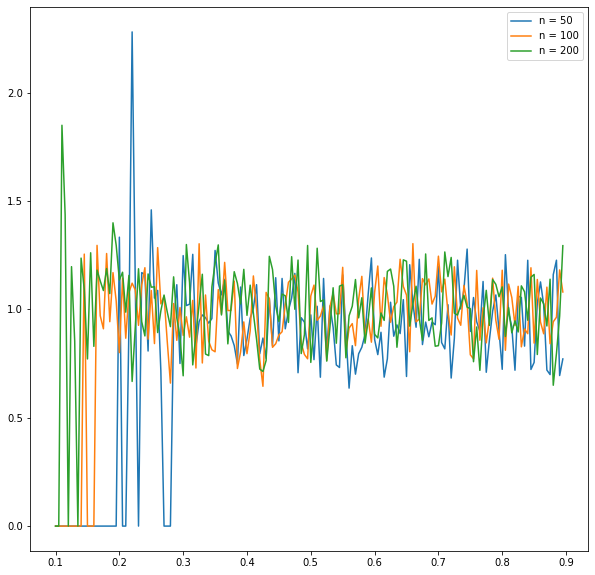

In [20]:
%%time

maxi1, dolzine1 = najdaljsa_pot_razdalja(50)
maxi2, dolzine2 = najdaljsa_pot_razdalja(100)
maxi3, dolzine3 = najdaljsa_pot_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 2min 23s, sys: 462 ms, total: 2min 24s
Wall time: 2min 24s


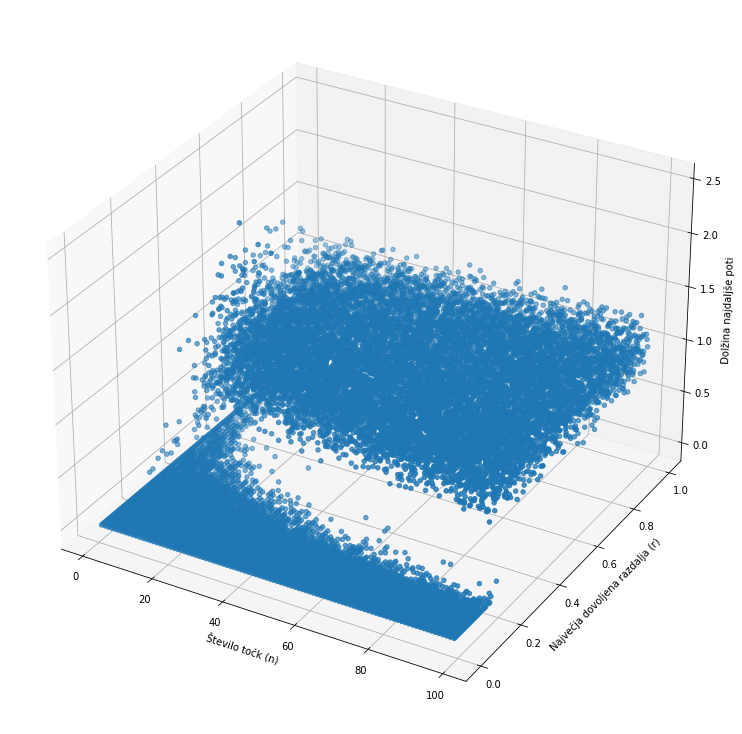

In [21]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.005

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, dolzine = najdaljsa_pot_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina najdaljše poti')


ax.scatter(nji, maxiji, dolzineji);

## Procent povezanih vozlišč

Izberemo naključno vozlišče in gledamo, s kakšnim procentom ostalih vozlišč je povezan pri 
spreminjajočih parametrih

In [22]:
def procent_povezanih_tocke(max_st_tock, max_razdalja): 
    tocke = []
    procenti = []
    
    for i in range(1, max_st_tock):
        a = Kvadrat(i, max_razdalja)
        tocke.append(i)
        
        opazovana = a.tocke[0]
        povezane = a.bliznje().get(opazovana)
        
        procenti.append(len(povezane) / len(a.tocke))
        
    return tocke, procenti

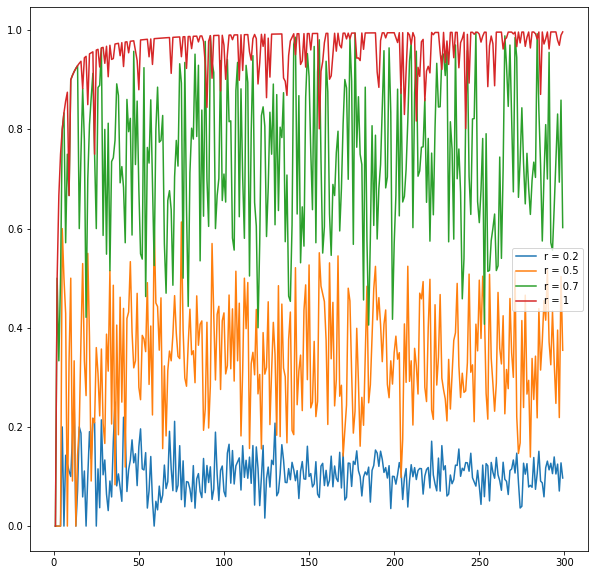

In [30]:
#tocke, procenti = procent_povezanih_tocke(300, 0.5)

#plt.plot(tocke, procenti);

tocke1, dolzine1 = procent_povezanih_tocke(300, 0.2)
tocke2, dolzine2 = procent_povezanih_tocke(300, 0.4)
tocke3, dolzine3 = procent_povezanih_tocke(300, 0.7)
tocke4, dolzine4 = procent_povezanih_tocke(300, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

In [3]:
def procent_povezanih_razdalja(st_tock, min_razdalja=0.1, max_razdalja=0.9, korak=0.005): 
    maxi = []
    procenti = []
    
    trenutna = min_razdalja
    while trenutna <= max_razdalja:
        a = Kvadrat(st_tock, trenutna)
        maxi.append(trenutna)
        
        opazovana = a.tocke[0]
        povezane = a.bliznje().get(opazovana)
        
        procenti.append(len(povezane) / len(a.tocke))
        
        trenutna += korak
        
    return maxi, procenti

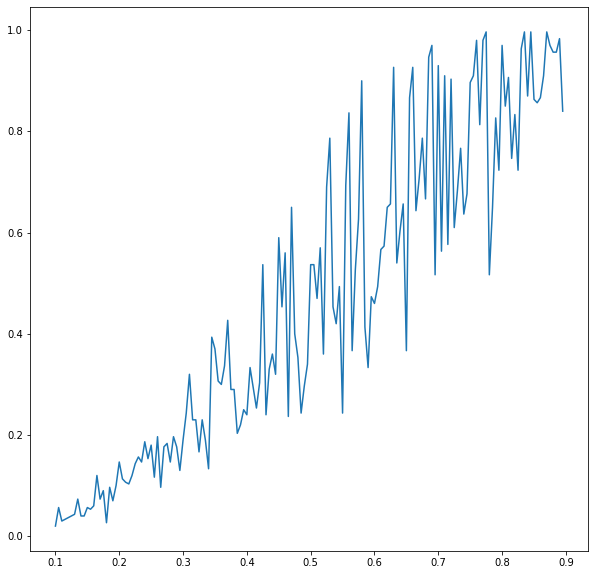

In [25]:
maxi, procenti = procent_povezanih_razdalja(300, 0.1, 0.9)

plt.plot(maxi, procenti)

CPU times: user 1min, sys: 277 ms, total: 1min
Wall time: 1min


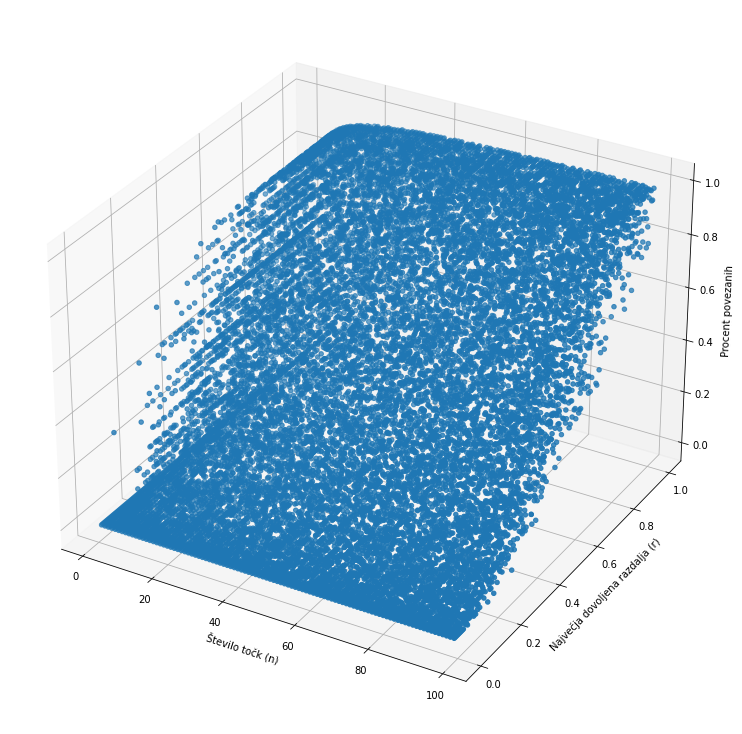

In [13]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
procentiji = []
korak = 0.005

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, procenti = procent_povezanih_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    procentiji += procenti
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Procent povezanih')


ax.scatter(nji, maxiji, procentiji);